# Gradient Boost

In [5]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

class AIVNGradientBooster:

    def __init__(self, max_depth=8, min_samples_split=5, min_samples_leaf=5, max_features=3, lr=0.1, num_iter=50):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.max_features = max_features
        self.lr = lr
        self.num_iter = num_iter
        self.y_mean = 0

    def __calculate_loss(self,y, y_pred):
        loss = (1/len(y)) * 0.5 * np.sum(np.square(y-y_pred))
        return loss

    def __take_gradient(self, y, y_pred):
        # grad = -(y-y_pred) # cho dự đoán = pred - alpha * residual
        grad = (y - y_pred)  # cho dự đoán = pred + alpha * residual
        return grad

    def __create_base_model(self, X, y):
        base = DecisionTreeRegressor(max_depth=self.max_depth,
                                    min_samples_split=self.min_samples_split,
                                    min_samples_leaf=self.min_samples_leaf,
                                    max_features=self.max_features)
        base.fit(X,y)
        return base

    def predict(self,models,y,X):
        pred_0 = np.array([self.y_mean] * len(X))
        pred = pred_0.reshape(len(pred_0),1)

        for i in range(len(models)):
            temp = (models[i].predict(X)).reshape(len(X),1)
            # pred -= self.lr * temp #cho dự đoán = pred - alpha * residual
            pred += self.lr * temp #cho dự đoán = pred + alpha * residual

        return pred

    def train(self, X, y):
        models = []
        losses = []
        self.y_mean = np.mean(y)
        pred_0 = np.array([np.mean(y)] * len(y))
        pred = pred_0.reshape(len(pred_0),1)
        # print("pred_0", pred_0)

        for epoch in range(self.num_iter):
            loss = self.__calculate_loss(y, pred)
            # print("loss: epoch", epoch, "=", loss)
            losses.append(loss)
            grads = self.__take_gradient(y, pred)
            # print("gradi", grads)
            base = self.__create_base_model(X, grads)
            r = (base.predict(X)).reshape(len(X),1)
            # print("r", r)
            # pred -= self.lr * r
            pred += self.lr * r
            models.append(base)

        return models, losses, pred_0

In [14]:
from sklearn.datasets import make_regression
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns


X, y = make_regression(n_samples=15, n_features=1,  random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)
#scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
y_train = np.array(y_train).reshape(X_train.shape[0],1)
y_test = np.array(y_test).reshape(X_test.shape[0],1)
#TRAIN
G = AIVNGradientBooster()
X_train = np.array([0, -1, 2, 3, 4, 5, 6, 7, 8, 9]).reshape(10,1)
y_train = np.array([0, -2, 4, 6, 8, 10, 12, 14, 16, 18]).reshape(10,1)

models, losses, pred_0 = G.train(X_train,y_train)

sns.set_style('darkgrid')
ax = sns.lineplot(x=range(2),y=losses)
ax.set(xlabel='Epoch',ylabel='Loss',title='Loss vs Epoch')

In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as pt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

#READ DATA
data = pd.read_csv("../source/advertising.csv")
data.fillna(0,inplace=True)
#X,y
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)
#scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
y_train = np.array(y_train).reshape(X_train.shape[0],1)
y_test = np.array(y_test).reshape(X_test.shape[0],1)
#TRAIN
G = AIVNGradientBooster()
models, losses, pred_0 = G.train(X_train,y_train)

[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Loss'), Text(0.5, 1.0, 'Loss vs Epoch')]

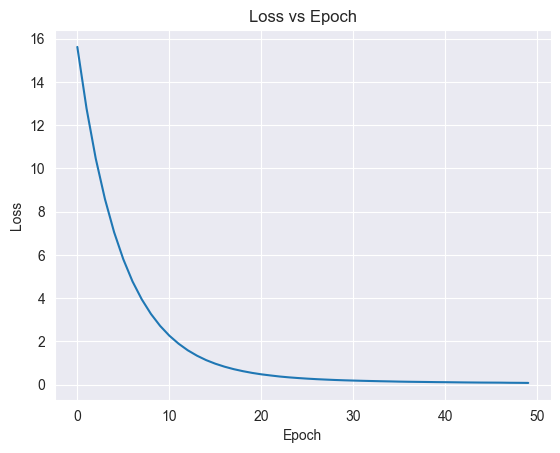

In [16]:
sns.set_style('darkgrid')
ax = sns.lineplot(x=range(50),y=losses)
ax.set(xlabel='Epoch',ylabel='Loss',title='Loss vs Epoch')